## About Dataset
#### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

1. **ID**: ID of each client
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. **SEX**: Gender (1=male, 2=female)
4. **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
6. **AGE**: Age in years
7. **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2** : Repayment status in August, 2005 (scale same as above)
9. **PAY_3** : Repayment status in July, 2005 (scale same as above)
10. **PAY_4**: Repayment status in June, 2005 (scale same as above)
11. **PAY_5**: Repayment status in May, 2005 (scale same as above)
12. **PAY_6**: Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month**: Default payment (1=yes, 0=no)

In [1188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [1120]:
original_df = pd.read_csv('default of credit card clients.csv')
data = original_df.copy()
data.shape

(30001, 25)

In [1121]:
data.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [1122]:
#Fixing column labels
data= data.set_axis(data.iloc[0], axis=1)
data = data.drop(data.index[0])
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [1123]:
## Dropping ID since it is useless here
data.drop(columns=['ID'], inplace=True)

In [1124]:
## making columns lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [1125]:
#cleaning column names
new_names = {'pay_0': 'repay_status_sept', 'pay_2': 'repay_status_aug', 'pay_3': 'repay_status_jul', 
             'pay_4': 'repay_status_jun', 'pay_5': 'repay_status_may', 'pay_6': 'repay_status_apr',
            'bill_amt1': 'bill_sept', 'bill_amt2': 'bill_aug', 'bill_amt3': 'bill_jul', 'bill_amt4': 'bill_jun',
            'bill_amt5': 'bill_may', 'bill_amt6': 'bill_apr', 'pay_amt1': 'pay_amt_sept', 'pay_amt2': 'pay_amt_aug',
            'pay_amt3': 'pay_amt_jul', 'pay_amt4': 'pay_amt_jun', 'pay_amt5': 'pay_amt_may', 'pay_amt6': 'pay_amt_apr',
            'default payment next month': 'defaulted'}
data.rename(columns=new_names, inplace=True)

In [1126]:
data.head(5)

,limit_bal,sex,education,marriage,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,...,bill_jun,bill_may,bill_apr,pay_amt_sept,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,defaulted
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Dependent Variable Info**

<AxesSubplot:xlabel='defaulted', ylabel='count'>

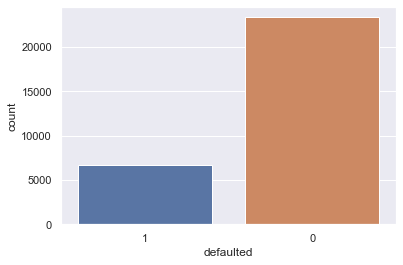

In [1127]:
sns.countplot(x = 'defaulted', data = data)

In [1128]:
# a lot more people who have not defaulted vs those who have - data is imbalanced - use SMOTE?

In [1129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   limit_bal          30000 non-null  object
 1   sex                30000 non-null  object
 2   education          30000 non-null  object
 3   marriage           30000 non-null  object
 4   age                30000 non-null  object
 5   repay_status_sept  30000 non-null  object
 6   repay_status_aug   30000 non-null  object
 7   repay_status_jul   30000 non-null  object
 8   repay_status_jun   30000 non-null  object
 9   repay_status_may   30000 non-null  object
 10  repay_status_apr   30000 non-null  object
 11  bill_sept          30000 non-null  object
 12  bill_aug           30000 non-null  object
 13  bill_jul           30000 non-null  object
 14  bill_jun           30000 non-null  object
 15  bill_may           30000 non-null  object
 16  bill_apr           30000 non-null  objec

In [1130]:
## Converting columns to numeric:# Iterate over the columns in the DataFrame
for column in data.columns:
    # Check if the column can be converted to a float
    if data[column].str.contains('\.').any():
        # If the column contains decimal points, convert it to a float
        data[column] = data[column].astype(float)
    else:
        # If the column does not contain decimal points, convert it to an integer
        data[column] = data[column].astype(int)

In [1131]:
data.dtypes

0
limit_bal            int64
sex                  int64
education            int64
marriage             int64
age                  int64
repay_status_sept    int64
repay_status_aug     int64
repay_status_jul     int64
repay_status_jun     int64
repay_status_may     int64
repay_status_apr     int64
bill_sept            int64
bill_aug             int64
bill_jul             int64
bill_jun             int64
bill_may             int64
bill_apr             int64
pay_amt_sept         int64
pay_amt_aug          int64
pay_amt_jul          int64
pay_amt_jun          int64
pay_amt_may          int64
pay_amt_apr          int64
defaulted            int64
dtype: object

In [1132]:
data.shape

(30000, 24)

In [1133]:
# no null values

In [1134]:
data2 = data.copy()

In [1135]:
y = data2['defaulted'].copy()
X = data2.drop('defaulted', axis=1).copy()

In [1136]:
# Print the number of unique values and their counts for each column
for column in X.columns:
    print(f"{column}: {X[column].nunique()}")

limit_bal: 81
sex: 2
education: 7
marriage: 4
age: 56
repay_status_sept: 11
repay_status_aug: 11
repay_status_jul: 11
repay_status_jun: 11
repay_status_may: 10
repay_status_apr: 10
bill_sept: 22723
bill_aug: 22346
bill_jul: 22026
bill_jun: 21548
bill_may: 21010
bill_apr: 20604
pay_amt_sept: 7943
pay_amt_aug: 7899
pay_amt_jul: 7518
pay_amt_jun: 6937
pay_amt_may: 6897
pay_amt_apr: 6939


**Observations**:
1. Since sex is binary and only has 2 unique values - don't need to worry about encoding this variable
2. Why do education and marriage have 7 and 4 unique values respectively?

In [1137]:
## analyzing education values
X['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [1138]:
## I will combine 5,6, and 0 with the unknown category (4)
X['education'] = X['education'].replace({5: 4, 6: 4, 0: 4})
X['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [1139]:
# analyzing marriage values
X['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [1140]:
#combining 0 with others category (3)
X['marriage'] = X['marriage'].replace({0: 3})
X['marriage'].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

In [1141]:
## Encoding education and marriage since they are unordered nominal features
education_onehot = pd.get_dummies(X['education'], prefix='education')

# Rename the education columns with the corresponding education levels
education_levels = {
    'education_1': 'graduate_school',
    'education_2': 'university',
    'education_3': 'high_school',
    'education_4': 'others_education'
}
education_onehot = education_onehot.rename(columns=education_levels)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, education_onehot], axis=1)

# Remove the original "education" column
X = X.drop(['education'], axis=1)

marriage_onehot = pd.get_dummies(X['marriage'], prefix='marriage')

# Rename the marriage columns with the corresponding marital statuses
marital_statuses = {
    'marriage_1': 'married',
    'marriage_2': 'single',
    'marriage_3': 'others_married'
}
marriage_onehot = marriage_onehot.rename(columns=marital_statuses)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, marriage_onehot], axis=1)

# Remove the original "marriage" column
X = X.drop(['marriage'], axis=1)

In [1142]:
X.head()

,limit_bal,sex,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_sept,...,pay_amt_jun,pay_amt_may,pay_amt_apr,graduate_school,university,high_school,others_education,married,single,others_married
1,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,1000,0,2000,0,1,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,1,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,1,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,1,0,0,1,0,0


In [1143]:
X.shape

(30000, 28)

In [1090]:
# specify the subset of columns to sum and assign the result to a new column
X['bill_amt_total'] = X[['bill_sept', 'bill_aug', 'bill_jul','bill_jun','bill_may','bill_apr']].sum(axis=1)

# drop the original columns
X.drop(['bill_sept', 'bill_aug', 'bill_jul','bill_jun','bill_may','bill_apr'], axis=1, inplace=True)

In [1144]:
#applying a standard scaler to the data to give values more equal weight between columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [1145]:
X.head()

,limit_bal,sex,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_sept,...,pay_amt_jun,pay_amt_may,pay_amt_apr,graduate_school,university,high_school,others_education,married,single,others_married
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.308063,-0.314136,-0.293382,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.244230,-0.314136,-0.180878,-0.738375,1.0669,-0.442752,-0.125886,-0.914261,0.937672,-0.112812
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.244230,-0.248683,-0.012122,-0.738375,1.0669,-0.442752,-0.125886,-0.914261,0.937672,-0.112812
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.237846,-0.244166,-0.237130,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,0.266434,-0.269039,-0.255187,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812


In [1146]:
X['defaulted'] = y.reset_index(drop=True)

In [1147]:
X['defaulted'].value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

**Model Assumptions**:
1. Multicollinearity

<AxesSubplot:title={'center':'Credit Card Data Heatmap'}>

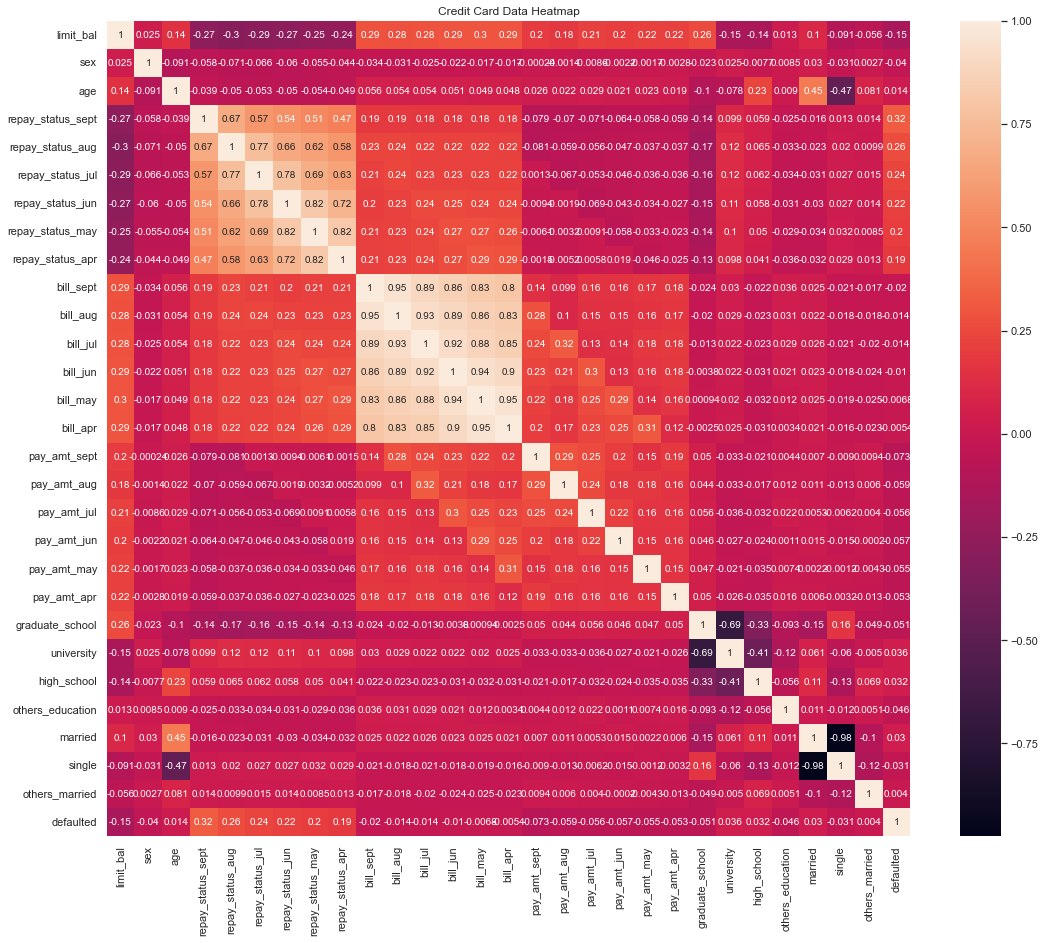

In [1148]:
## Visualize using correlation
corr = X.corr()
plt.figure(figsize=(18,15))
plt.title('Credit Card Data Heatmap')
sns.heatmap(corr,annot=True)

**Observations**:
1. credit card bill statement amounts for each month are highly correlated with each other
2. Repayment status for each month is high correlcated with one another
3. No strong correlations between default outcome and any potential predictor variables.
4. Potential Multicollinearity issues but don't want to remove for now as they could be useful predictors

**Outlier removal** 
1. removes half of the dataset
2. I'm commenting this out for now

In [1149]:
## plot to visualize outliers of different variables
fig = px.box(X, x='defaulted',y = X['bill_amt_total'])
fig.show()

KeyError: 'bill_amt_total'

In [1150]:
fig = px.histogram(X, x='pay_amt_sept')

fig.show()

In [1151]:
#def find_outliers_IQR(df):

   #q1=df.quantile(0.25)

   #q3=df.quantile(0.75)

   #IQR=q3-q1

   #outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   #return outliers

In [1152]:
#def drop_outliers(df, columns):
    #for col in columns:
        #q1 = df[col].quantile(0.25)
        #q3 = df[col].quantile(0.75)
        #iqr = q3 - q1
        #outliers = df[(df[col] < (q1 - 1.5*iqr)) | (df[col] > (q3 + 1.5*iqr))].index
        #df.drop(outliers, inplace=True)
    #return df
#columns_to_drop_outliers = ['limit_bal','bill_sept','bill_aug','bill_jul','bill_jun','bill_may','bill_apr','pay_amt_sept',
          #'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may','pay_amt_apr','age']
#X = drop_outliers(X, columns_to_drop_outliers)

**Feature Selection**

In [1153]:
Xf = X.drop('defaulted', axis=1).values
yf = X['defaulted']

yf = yf.astype(int)
print(Xf.shape)
print(yf.shape)

(30000, 28)
(30000,)


In [1154]:
## Tree-Based estimators
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=10)
dt.fit(Xf,yf)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [1155]:
##Running Feature Importance
fi_col = []
fi = []
for i,column in enumerate(X.drop('defaulted',axis=1)):
    print("The feature importance for {} is : {}".format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for limit_bal is : 0.0550959741694055
The feature importance for sex is : 0.0014437129602246903
The feature importance for age is : 0.023545790473407664
The feature importance for repay_status_sept is : 0.4314265308582097
The feature importance for repay_status_aug is : 0.10613519698070646
The feature importance for repay_status_jul is : 0.013204773254106131
The feature importance for repay_status_jun is : 0.008088911571971636
The feature importance for repay_status_may is : 0.018639654880334294
The feature importance for repay_status_apr is : 0.014710476179457869
The feature importance for bill_sept is : 0.05335358007125845
The feature importance for bill_aug is : 0.014902726456923301
The feature importance for bill_jul is : 0.01850880155366305
The feature importance for bill_jun is : 0.012494864935063807
The feature importance for bill_may is : 0.017325282056279902
The feature importance for bill_apr is : 0.021531901421073415
The feature importance for pay_amt_

In [1156]:
## Creating a dataframe
fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
fi_df.sort_values('Feature Importance',ascending=False).reset_index()

,index,Feature,Feature Importance
0,3,repay_status_sept,0.431427
1,4,repay_status_aug,0.106135
2,17,pay_amt_jul,0.062412
3,0,limit_bal,0.055096
4,9,bill_sept,0.053354
5,16,pay_amt_aug,0.028930
6,15,pay_amt_sept,0.025312
7,2,age,0.023546
8,14,bill_apr,0.021532
9,20,pay_amt_apr,0.019691


**Observations**
1. No columns at 0 so won't remove anything from model

In [1157]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X1 = X.drop('defaulted', axis=1)
y1 = X['defaulted']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [1158]:
X_train['defaulted'] = y_train
X_test['defaulted'] = y_test

In [1159]:
X.columns

Index(['limit_bal', 'sex', 'age', 'repay_status_sept', 'repay_status_aug',
       'repay_status_jul', 'repay_status_jun', 'repay_status_may',
       'repay_status_apr', 'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun',
       'bill_may', 'bill_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul',
       'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'graduate_school',
       'university', 'high_school', 'others_education', 'married', 'single',
       'others_married', 'defaulted'],
      dtype='object')

In [1160]:
X_test

,limit_bal,sex,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_sept,...,pay_amt_may,pay_amt_apr,graduate_school,university,high_school,others_education,married,single,others_married,defaulted
2308,-1.059646,-1.234323,-1.137534,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.575264,...,-0.215956,-0.180878,-0.738375,1.066900,-0.442752,-0.125886,-0.914261,0.937672,-0.112812,0
22404,-0.134759,0.810161,-1.029047,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.161310,...,-0.139441,-0.143246,1.354326,-0.937295,-0.442752,-0.125886,-0.914261,0.937672,-0.112812,0
23397,-0.751350,0.810161,-0.378129,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,0.256655,...,-0.150503,-0.149715,-0.738375,-0.937295,2.258602,-0.125886,1.093780,-1.066471,-0.112812,0
25058,-0.288907,-1.234323,1.466139,0.014861,0.111736,0.138865,0.188746,0.234917,-0.616452,-0.414823,...,0.144757,-0.045424,-0.738375,-0.937295,2.258602,-0.125886,-0.914261,0.937672,-0.112812,0
2664,-0.905498,0.810161,0.055816,0.014861,0.111736,0.138865,0.188746,0.234917,1.992316,0.584028,...,-0.314136,-0.237130,-0.738375,1.066900,-0.442752,-0.125886,-0.914261,0.937672,-0.112812,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,-0.982572,0.810161,1.466139,0.904712,-1.558876,-1.532192,-1.521944,-1.530046,-0.616452,-0.695642,...,-0.304318,-0.284438,-0.738375,-0.937295,2.258602,-0.125886,1.093780,-1.066471,-0.112812,0
9355,1.252573,0.810161,0.706734,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.444184,...,0.013131,-0.012122,-0.738375,1.066900,-0.442752,-0.125886,1.093780,-1.066471,-0.112812,0
28201,1.021351,0.810161,1.357652,0.904712,2.617654,1.809921,-0.666599,0.234917,-0.616452,-0.695669,...,-0.200902,-0.293382,-0.738375,-0.937295,2.258602,-0.125886,-0.914261,0.937672,-0.112812,1
19705,-0.520128,0.810161,1.249166,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,-1.486041,-0.605114,...,-0.314136,-0.293382,-0.738375,1.066900,-0.442752,-0.125886,1.093780,-1.066471,-0.112812,1


In [1161]:
logit_model = smf.logit(formula = 'defaulted~limit_bal+repay_status_sept*repay_status_aug*repay_status_jul+pay_amt_jul', data = X_train).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.457565
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              defaulted   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22490
Method:                           MLE   Df Model:                            9
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1370
Time:                        17:57:19   Log-Likelihood:                -10295.
converged:                       True   LL-Null:                       -11930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              -1.6534      0.022    -75.217      0.000      -1.696      -1.610
limit_bal                                              -0.2109      0.021    -10.095      0.000      -0.252      -0.170
repay_status_sept                                       0.7817      0.025     31.338      0.000       0.733       0.831
repay_status_aug                                       -0.0700      0.036     -1.966      0.049      -0.140      -0.000
repay_status_sept:repay_status_aug                      0.1533      0.028      5.398      0.000       0.098       0.209
repay_status_jul                                        0.1238      0.033      3.797      0.000       0.060       0.188
repay_status_sept:repay_status_jul                      0.0503      0.032      1.556      0.120      -0.013       0.114
repay_status_aug:repay_status_jul                       0.1964      0.017     11.598      0.000       0.163       0.230
repay_status_sept:repay_status_aug:repay_status_jul    -0.0902      0.004    -21.245      0.000      -0.098      -0.082
pay_amt_jul                                            -0.1029      0.032     -3.190      0.001      -0.166      -0.040
=======================================================================================================================
"""

In [1162]:
logit_model.bic

20690.640270570573

In [1163]:
#Plotting residuals vs fitted values
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x = (logit_model.fittedvalues), y=(logit_model.resid),color = 'orange')
sns.lineplot(x = [logit_model.fittedvalues.min(),logit_model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

AttributeError: 'LogitResults' object has no attribute 'resid'

In [ ]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
logit_model = smf.logit(formula = 'defaulted~limit_bal+repay_status_sept*repay_status_aug*repay_status_jul+pay_amt_jul', data = X_train).fit()
sns.lineplot(x = 'duration', y= logit_model.predict(train), data = train, color = 'blue') 
logit_model.llf

In [1171]:
#we will only take a look at how it behaves with the interaction terms
# creating the interaction terns and running the same algo
#Creating a dataframe with all the predictors
Xt = X_train[['limit_bal','sex','age','repay_status_sept','repay_status_aug','repay_status_jul','repay_status_jun',
             'repay_status_may','repay_status_apr','pay_amt_sept','pay_amt_aug','pay_amt_jul','pay_amt_jun','pay_amt_may','pay_amt_apr',
             'graduate_school','university','high_school','others_education','married','single','others_married']]
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = X_train[['limit_bal','sex','age','repay_status_sept','repay_status_aug','repay_status_jul','repay_status_jun',
             'repay_status_may','repay_status_apr','pay_amt_sept','pay_amt_aug','pay_amt_jul','pay_amt_jun','pay_amt_may','pay_amt_apr',
             'graduate_school','university','high_school','others_education','married','single','others_married']]

In [1172]:
X_train.columns

Index(['limit_bal', 'sex', 'age', 'repay_status_sept', 'repay_status_aug',
       'repay_status_jul', 'repay_status_jun', 'repay_status_may',
       'repay_status_apr', 'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun',
       'bill_may', 'bill_apr', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_jul',
       'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'graduate_school',
       'university', 'high_school', 'others_education', 'married', 'single',
       'others_married', 'defaulted'],
      dtype='object')

In [1173]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.logit('defaulted~' + '+'.join(predictor_subset),data = X_train).fit()
    bic = model.bic
    return {"model":model, "BIC":bic}

In [1174]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['BIC'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [1175]:
def backward_selection():
    models_best = pd.DataFrame(columns=["BIC", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [1176]:
models_best = backward_selection()

PerfectSeparationError: Perfect separation detected, results not available

In [1177]:
y = X_train.defaulted

In [1184]:
X = X_train.iloc[:,:-1]

In [1186]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [1189]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

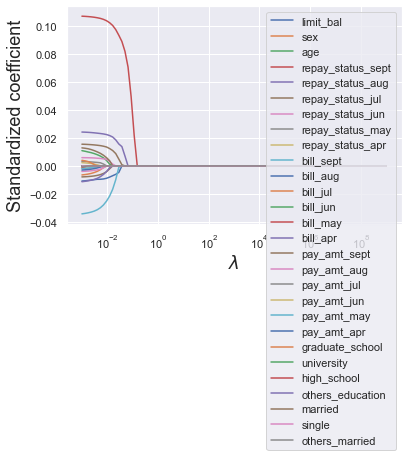

In [1190]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X_train.columns[:-1]);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
plt.legend(X_train.columns[:-1]);

In [1192]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.0008513845861129498

In [1198]:
X1 = X_test.iloc[:,:-1]
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X, y)
pred=lasso.predict(X1)

In [1199]:
lasso.coef_

array([-0.01092211, -0.00658235,  0.01111195,  0.10722976,  0.02427389,
        0.01557739,  0.00593629,  0.00323392,  0.00238841, -0.03446336,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.00792546, -0.00398382, -0.00067553, -0.0018871 , -0.00189453,
       -0.00300469,  0.00417691,  0.        , -0.0010801 , -0.01143051,
        0.01303371, -0.        , -0.00074535])

In [1200]:
pred

array([0.24952976, 0.17379369, 0.23470133, ..., 0.41863232, 0.14150164,
       0.03179101])